<a href="https://colab.research.google.com/github/hildazaqya/project-capstone/blob/main/ML/FoodectionRestNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#this file from kaggle API personnal account
from google.colab import files

# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"hildaz","key":"f0531584456defa83c8102f0f937ac8d"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
##link dataset in Kaggle.com
!kaggle datasets download -d alinesellwia/food-freshness

food-freshness.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#new directory for stores temporary data
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [5]:
#unzip the data
!unzip -q food-freshness.zip -d /content/data

replace /content/data/Foodection Dataset/test/jeruk_busuk/jeruk_busuk (1).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


Resize Gambar Untuk Satu Pixel Yang Sama

In [6]:
#Train Data, Augmentation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout

#Transfer Learning
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import EfficientNetB0

#optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

#interach with OS -> make directory
import os

#evaluation
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

#Visualization
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#for save model
from tensorflow.keras.models import load_model
from google.colab import files


In [7]:
base_dir= '/content/data/Foodection Dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['test', 'train']

Contents of train directory:
['wortel_busuk', 'tomat_segar', 'tomat_busuk', 'jeruk_segar', 'tomat_segar_sedang', 'wortel_segar_sedang', 'wortel_segar', 'jeruk_busuk', 'jeruk_segar_sedang']

Contents of validation directory:
['wortel_busuk', 'tomat_segar', 'tomat_busuk', 'jeruk_segar', 'wortel_segar_sedang', 'wortel_segar', 'jeruk_busuk', 'jeruk_segar_sedang', 'tomat _segar_sedang']


In [8]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Specify class of the directory train
train_jeruksegar_dir = os.path.join(train_dir, 'jeruk_segar')
train_wortelsegar_dir = os.path.join(train_dir, 'wortel_segar')
train_wortelsegarsedang_dir = os.path.join(train_dir, 'wortel_segar')
train_tomatbusuk_dir = os.path.join(train_dir, 'tomat_busuk')
train_jeruksegarsedang_dir = os.path.join(train_dir, 'jeruk_segar_sedang')
train_jerukbusuk_dir = os.path.join(train_dir, 'jeruk_busuk')
train_wortelbusuk_dir = os.path.join(train_dir, 'wortel_busuk')
train_tomatsegar_dir = os.path.join(train_dir, 'tomat_segar')
train_tomatsegarsedang_dir = os.path.join(train_dir, 'tomat_segar_sedang')

# Specify class of the directory test
test_jeruksegar_dir = os.path.join(test_dir, 'jeruk_segar')
test_wortelsegar_dir = os.path.join(test_dir, 'wortel_segar')
test_wortelsegarsedang_dir = os.path.join(test_dir, 'wortel_segar_sedang')
test_tomatbusuk_dir = os.path.join(test_dir, 'tomat_busuk')
test_jeruksegarsedang_dir = os.path.join(test_dir, 'jeruk_segar_sedang')
test_jerukbusuk_dir = os.path.join(test_dir, 'jeruk_busuk')
test_wortelbusuk_dir = os.path.join(test_dir, 'wortel_busuk')
test_tomatsegar_dir = os.path.join(test_dir, 'tomat_segar')
test_tomatsegarsedang_dir = os.path.join(test_dir, 'tomat _segar_sedang')

In [9]:
train_jeruksegar_fnames = os.listdir(train_jeruksegar_dir)
train_wortelsegar_fnames = os.listdir(train_wortelsegar_dir)
train_wortelsegarsedang_fnames = os.listdir(train_wortelsegarsedang_dir)
train_tomatbusuk_fnames = os.listdir(train_tomatbusuk_dir)
train_jeruksegarsedang_fnames = os.listdir(train_jeruksegarsedang_dir)
train_jerukbusuk_fnames = os.listdir(train_jerukbusuk_dir)
train_wortelbusuk_fnames = os.listdir(train_wortelbusuk_dir)
train_tomatsegar_fnames = os.listdir(train_tomatsegar_dir)
train_tomatsegarsedang_fnames = os.listdir(train_tomatsegarsedang_dir)

In [10]:
print('total training jeruk segar images :', len(os.listdir(train_jeruksegar_dir)))
print('total training wortel segar images :', len(os.listdir( train_wortelsegar_dir)))
print('total training wortel segar sedang images :', len(os.listdir(train_wortelsegarsedang_dir)))
print('total training tomat busuk images :', len(os.listdir(train_tomatbusuk_dir)))
print('total training jeruk segar sedang images :', len(os.listdir(train_jeruksegarsedang_dir)))
print('total training jeruk busuk images :', len(os.listdir(train_jerukbusuk_dir)))
print('total training wortel busuk images :', len(os.listdir(train_wortelbusuk_dir)))
print('total training tomat segar images :', len(os.listdir(train_tomatsegar_dir)))
print('total training tomat segar sedang images :', len(os.listdir(train_tomatsegarsedang_dir)))

print('total testing jeruk segar images :', len(os.listdir(test_jeruksegar_dir)))
print('total testing wortel segar images :', len(os.listdir(test_wortelsegar_dir)))
print('total testing wortel segar sedang images :', len(os.listdir(test_wortelsegarsedang_dir)))
print('total testing tomat busuk images :', len(os.listdir(test_tomatbusuk_dir)))
print('total testing jeruk segar sedang images :', len(os.listdir(test_jeruksegarsedang_dir)))
print('total testing jeruk busuk images :', len(os.listdir(test_jerukbusuk_dir)))
print('total testing wortel busuk images :', len(os.listdir(test_wortelbusuk_dir)))
print('total testing tomat segar images :', len(os.listdir(test_tomatsegar_dir)))
print('total testing tomat segar sedang images :', len(os.listdir(test_tomatsegarsedang_dir)))

total training jeruk segar images : 3460
total training wortel segar images : 4241
total training wortel segar sedang images : 4241
total training tomat busuk images : 1115
total training jeruk segar sedang images : 2401
total training jeruk busuk images : 1658
total training wortel busuk images : 1360
total training tomat segar images : 4745
total training tomat segar sedang images : 3109
total testing jeruk segar images : 1482
total testing wortel segar images : 1818
total testing wortel segar sedang images : 966
total testing tomat busuk images : 478
total testing jeruk segar sedang images : 1029
total testing jeruk busuk images : 703
total testing wortel busuk images : 583
total testing tomat segar images : 2033
total testing tomat segar sedang images : 1332


In [44]:
from PIL import Image
import os

def resize_images_in_directory(directory, target_size_size):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Sesuaikan dengan ekstensi gambar yang Anda miliki
                file_path = os.path.join(root, file)
                img = Image.open(file_path)

                if img.mode == 'RGBA':
                    img = img.convert('RGB')

                img_resized = img.resize(target_size)
                img_resized.save(file_path)

# Tentukan ukuran baru yang diinginkan, misalnya (150,150)
target_size = (150,150)

# Proses direktori train
resize_images_in_directory("/content/data/Foodection Dataset/train/jeruk_busuk", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/train/jeruk_segar", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/train/jeruk_segar_sedang", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/train/tomat_busuk", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/train/tomat_segar", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/train/tomat_segar_sedang", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/train/wortel_busuk", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/train/wortel_segar", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/train/wortel_segar_sedang", target_size)

# Proses direktori test
resize_images_in_directory("/content/data/Foodection Dataset/test/jeruk_busuk", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/test/jeruk_segar", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/test/jeruk_segar_sedang", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/test/tomat _segar_sedang", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/test/tomat_busuk", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/test/tomat_segar", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/test/wortel_busuk", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/test/wortel_segar", target_size)
resize_images_in_directory("/content/data/Foodection Dataset/test/wortel_segar_sedang", target_size)

In [47]:
img_height = 150
img_width = 150
img_channels = 3
num_epochs = 20

train_datagen = ImageDataGenerator( rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.1,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255,
  validation_split=0.2)

test_datagen  = ImageDataGenerator( rescale = 1.0/255.)

train_generator= train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    target_size= target_size)
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                    batch_size=20,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    target_size= target_size)

Found 24341 images belonging to 9 classes.
Found 10422 images belonging to 9 classes.


In [79]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D

baseModel = ResNet50V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(9, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs = headModel)

In [80]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_9[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 77, 77, 64)           0         ['conv1_conv[0][0]']          
                                                                                            

In [81]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import schedules  # Import the schedules module


## Hyperparameter
INIT_LR = 1e-3
BS = 10
EPOCHS = 25

print("[INFO] compiling model...")

# Create a learning rate schedule
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=EPOCHS,
    decay_rate=0.9
)

opt = Adam(learning_rate=lr_schedule)

[INFO] compiling model...


In [82]:
from tensorflow.keras.callbacks import Callback, LearningRateScheduler
## Define a Callback function
desired_accuracy = 0.999


class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>desired_accuracy):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

my_callback = myCallback()

In [83]:
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [84]:
history = model.fit(
            train_generator,
            validation_data= test_generator,
            epochs=10,
            callbacks=[my_callback]
)

Epoch 1/10
 539/1218 [============>.................] - ETA: 2:01 - loss: 0.2184 - accuracy: 0.6414

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1218/1218 [==============================] - 269s 195ms/step - loss: 0.1631 - accuracy: 0.7497 - val_loss: 0.2656 - val_accuracy: 0.5800
Epoch 2/10
1218/1218 [==============================] - 234s 192ms/step - loss: 0.1039 - accuracy: 0.8565 - val_loss: 0.2655 - val_accuracy: 0.5865
Epoch 3/10
1218/1218 [==============================] - 230s 189ms/step - loss: 0.1031 - accuracy: 0.8635 - val_loss: 0.2692 - val_accuracy: 0.5844
Epoch 4/10
1218/1218 [==============================] - 232s 190ms/step - loss: 0.1035 - accuracy: 0.8595 - val_loss: 0.2720 - val_accuracy: 0.5805
Epoch 5/10
1218/1218 [==============================] - 236s 193ms/step - loss: 0.1053 - accuracy: 0.8549 - val_loss: 0.2658 - val_accuracy: 0.5837
Epoch 6/10
1218/1218 [==============================] - 234s 192ms/step - loss: 0.1047 - accuracy: 0.8575 - val_loss: 0.2707 - val_accuracy: 0.5833
Epoch 7/10
1218/1218 [==============================] - 234s 192ms/step - loss: 0.1023 - accuracy: 0.8592 - val_loss: 0.268

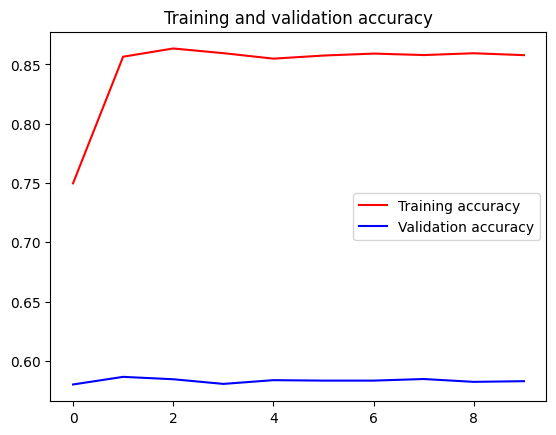

<Figure size 640x480 with 0 Axes>

In [85]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()